**Assignment‑2:** Basic Data Pre‑Processing (UCI Dataset) Objective: Perform core data‑preprocessing operations on a real dataset using Python.

**Dataset used:** Online Retail Dataset

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**Downloaded the Dataset**

In [1]:
pip install ucimlrepo

**Loaded the Dataset**

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
online_retail = fetch_ucirepo(id=352)

# data (as pandas dataframes)
X = online_retail.data.features
y = online_retail.data.targets

# metadata
print(online_retail.metadata)

# variable information
print(online_retail.variables)


{'uci_id': 352, 'name': 'Online Retail', 'repository_url': 'https://archive.ics.uci.edu/dataset/352/online+retail', 'data_url': 'https://archive.ics.uci.edu/static/public/352/data.csv', 'abstract': 'This is a transactional data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate', 'Sequential', 'Time-Series'], 'num_instances': 541909, 'num_features': 6, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': None, 'index_col': ['InvoiceNo', 'StockCode'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2015, 'last_updated': 'Mon Oct 21 2024', 'dataset_doi': '10.24432/C5BW33', 'creators': ['Daqing Chen'], 'intro_paper': {'ID': 361, 'type': 'NATIVE', 'title': 'Data mining for the online retail industry: A case study of RFM model-based customer segmenta

**Combine Features and Target**

In [6]:
df = pd.concat([X, y], axis=1)

**Initial Data Exploration**

In [7]:
df.head()
df.shape
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Description  540455 non-null  object 
 1   Quantity     541909 non-null  int64  
 2   InvoiceDate  541909 non-null  object 
 3   UnitPrice    541909 non-null  float64
 4   CustomerID   406829 non-null  float64
 5   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 24.8+ MB


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


**Check Missing Values**

In [8]:
df.isnull().sum()


,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


**Handle Missing Values**

In [9]:
df = df.dropna(subset=["CustomerID"])


**Fill missing descriptions**

In [10]:
df["Description"] = df["Description"].fillna("Unknown")


**Remove Noisy / Invalid Data**

In [11]:
df = df[(df["Quantity"] > 0) & (df["UnitPrice"] > 0)]


**Data Type Conversion**

In [12]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df["CustomerID"] = df["CustomerID"].astype(int)


**Feature Engineering**

In [13]:
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]


**Encode Categorical Data**

In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["Country_Encoded"] = le.fit_transform(df["Country"])


**Encode Categorical Data**

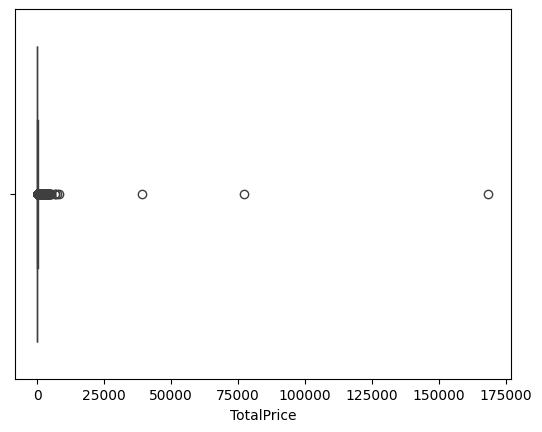

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df["TotalPrice"])
plt.show()


**Feature Scaling**

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[["Quantity", "UnitPrice", "TotalPrice"]] = scaler.fit_transform(
    df[["Quantity", "UnitPrice", "TotalPrice"]]
)


**Final Preprocessed Dataset**

In [17]:
df.head()
df.shape


(397884, 8)

**Download the Cleaned Dataset**

In [19]:
from google.colab import files
files.download("online_retail_cleaned.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Conclusion**

The Online Retail dataset was loaded using the ucimlrepo library and preprocessed by handling missing values, removing noisy data, converting data types, encoding categorical variables, detecting outliers, and scaling numerical features. These preprocessing steps improved data quality and prepared the dataset for further analysis.